In [1]:
%pip install -r requirements.txt --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(10,8)})
sns.set_palette("bright")

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

data_home = "./Data/"


def load_dataset_train_test():
    data_train = fetch_20newsgroups(
        data_home=data_home,
        subset="train",
        shuffle=True,
        random_state=42,
        remove=('headers', 'footers', 'quotes')
    )

    data_test = fetch_20newsgroups(
        data_home=data_home,
        subset="test",
        shuffle=True,
        random_state=42,
        remove=('headers', 'footers', 'quotes')
    )

    target_names = data_train.target_names
    y_train, y_test = data_train.target, data_test.target

    vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")

    X_train = vectorizer.fit_transform(data_train.data)
    X_test = vectorizer.transform(data_test.data)
    feature_names = vectorizer.get_feature_names_out()

    return X_train, X_test, y_train, y_test, feature_names, target_names


def load_dataset():
    data = fetch_20newsgroups(
        data_home=data_home, subset="all", shuffle=False, remove=('headers', 'footers', 'quotes')
    )
    y = data.target
    target_names = data.target_names
    vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
    X = vectorizer.fit_transform(data.data)
    feature_names = vectorizer.get_feature_names_out()
    return X, y, feature_names, target_names

def twenty_newsgroup_to_csv(save_target: bool = False):
    data = fetch_20newsgroups(
        data_home=data_home, subset="all", shuffle=False, remove=('headers', 'footers', 'quotes')
    )

    if not save_target:
        df = pd.DataFrame([data.data]).T
        df.columns = ['text']
        df.to_csv(data_home + '20_newsgroup.csv', index=False)
        return 
        
    df = pd.DataFrame([data.data, data.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( data.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out.to_csv(data_home + '20_newsgroup.csv', index=False)
    
twenty_newsgroup_to_csv(save_target=False)

In [3]:
# X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset()
X, y, feature_names, target_names = load_dataset()

In [4]:
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# LSA (SVD)

In [5]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20)
lsa = svd.fit_transform(X)
lsa_df = pd.DataFrame(svd.components_, index=[f"topic_{i}" for i in range(1, 21)], columns=feature_names).T
lsa_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
00,0.028244,-0.044380,-0.050916,0.068102,0.040671,-0.087837,-0.251998,0.046172,-0.118475,0.083318,0.032782,0.160329,0.273477,0.259535,0.363955,0.029242,0.038315,-0.174331,0.207288,0.028163
000,0.023307,0.010355,-0.041160,0.008918,-0.007221,-0.018281,-0.044257,0.039069,-0.065920,0.002794,0.011640,0.038624,-0.046082,0.016303,-0.019439,0.013802,-0.029579,-0.030882,0.022402,-0.002281
0000,0.000388,-0.000449,-0.000281,-0.000188,0.000102,-0.000779,-0.001163,0.000322,-0.000479,0.000494,-0.000415,-0.000545,-0.000164,0.000385,-0.000175,0.000238,-0.000961,0.000148,0.000796,-0.000733
00000,0.000429,-0.001029,-0.000085,-0.000503,-0.000329,-0.001007,-0.003245,-0.000001,-0.000358,0.000152,-0.000622,-0.003395,-0.000266,0.001456,-0.001461,0.002390,-0.004252,0.000946,0.001054,0.001445
0001,0.000457,-0.000527,0.000659,-0.000415,0.000452,0.000076,0.000077,0.000277,-0.000058,-0.000061,-0.000154,0.000699,-0.000193,0.000633,-0.000475,-0.000247,-0.000356,0.001988,0.000266,0.000297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zw,0.000023,-0.000044,-0.000046,0.000063,0.000047,-0.000068,-0.000232,0.000024,-0.000090,0.000048,0.000035,0.000017,0.000101,0.000105,0.000022,-0.000021,-0.000195,0.000018,0.000196,0.000050
zx,0.001844,-0.000353,-0.002457,0.001938,0.000839,-0.000997,0.001790,0.000795,-0.001076,0.005949,-0.002226,0.001353,-0.000212,-0.002898,-0.001250,-0.000116,-0.001782,0.000115,0.006816,-0.005763
zy,0.000032,-0.000060,-0.000059,0.000079,0.000059,-0.000095,-0.000311,0.000030,-0.000117,0.000059,0.000047,0.000007,0.000135,0.000126,0.000015,-0.000027,-0.000261,0.000030,0.000259,0.000078
zyxel,0.000766,-0.001337,0.000059,0.000005,-0.000198,-0.000946,-0.001299,0.000303,0.000024,0.000729,0.000080,-0.002161,0.000918,-0.000006,0.000154,0.000424,0.002141,0.001026,-0.002865,-0.002714


In [6]:
def get_top_words(df, k):
    result = {}
    
    for col in df.columns:
        top_indices = df[col].nlargest(k).index.tolist() + list(reversed(df[col].nsmallest(k).index))
        formatted_entries = []
        for idx in top_indices:
            # sign = '+' if df[col][idx] >= 1e-4 else '-' if df[col][idx] <= -1e-4 else '0'
            # formatted_entries.append(f"{idx} ({sign})")
            formatted_entries.append(f"{idx} ({df[col][idx]:3.1f})")
        
        # Store in result dictionary
        result[col] = formatted_entries
    
    return pd.DataFrame(result)

lsa_top_words = get_top_words(lsa_df, 5)
display(lsa_top_words.iloc[:,:10])
display(lsa_top_words.iloc[:,10:])

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,don (0.2),god (0.3),god (0.5),drive (0.4),game (0.3),windows (0.4),know (0.3),edu (0.3),key (0.2),car (0.3)
1,like (0.2),people (0.2),windows (0.2),scsi (0.3),games (0.2),dos (0.2),thanks (0.3),geb (0.2),geb (0.2),just (0.2)
2,know (0.2),jesus (0.1),jesus (0.2),god (0.2),team (0.2),file (0.1),does (0.2),dsl (0.2),pitt (0.2),bike (0.2)
3,just (0.2),think (0.1),does (0.1),ide (0.2),thanks (0.2),think (0.1),don (0.2),n3jxp (0.2),dsl (0.2),ve (0.1)
4,people (0.2),believe (0.1),bible (0.1),card (0.1),windows (0.1),problem (0.1),just (0.1),cadre (0.2),cadre (0.2),god (0.1)
5,mf3t (0.0),dos (-0.1),car (-0.1),government (-0.1),scsi (-0.2),email (-0.1),key (-0.1),god (-0.1),israel (-0.1),thanks (-0.2)
6,9f3w2 (0.0),card (-0.1),games (-0.1),program (-0.1),chip (-0.2),does (-0.1),edu (-0.1),clipper (-0.1),car (-0.1),people (-0.2)
7,m9l3 (0.0),drive (-0.2),team (-0.1),key (-0.1),government (-0.2),edu (-0.2),10 (-0.1),chip (-0.2),people (-0.1),scsi (-0.2)
8,9l2 (0.0),thanks (-0.2),year (-0.1),file (-0.1),key (-0.2),mail (-0.2),god (-0.2),game (-0.2),00 (-0.1),drive (-0.2)
9,0qq (0.0),windows (-0.2),game (-0.2),windows (-0.2),drive (-0.2),thanks (-0.3),00 (-0.3),key (-0.2),armenian (-0.1),game (-0.2)


,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,card (0.5),windows (0.4),don (0.4),does (0.5),00 (0.4),space (0.3),israel (0.3),does (0.2),israel (0.3),car (0.3)
1,video (0.2),car (0.2),00 (0.3),know (0.4),window (0.2),like (0.2),window (0.3),com (0.2),just (0.2),card (0.2)
2,monitor (0.2),dos (0.2),think (0.2),00 (0.3),fbi (0.1),thanks (0.1),game (0.2),space (0.1),00 (0.2),window (0.2)
3,bus (0.1),thanks (0.2),list (0.2),space (0.1),koresh (0.1),windows (0.1),israeli (0.2),problem (0.1),bike (0.2),people (0.2)
4,does (0.1),00 (0.2),mail (0.1),10 (0.1),did (0.1),just (0.1),jews (0.1),edu (0.1),know (0.1),problem (0.1)
5,program (-0.1),think (-0.1),file (-0.1),god (-0.1),windows (-0.1),know (-0.2),armenian (-0.1),people (-0.1),does (-0.1),good (-0.1)
6,disk (-0.1),card (-0.1),armenian (-0.1),edu (-0.1),scsi (-0.1),com (-0.2),ftp (-0.1),graphics (-0.1),mac (-0.1),bike (-0.2)
7,files (-0.1),graphics (-0.1),god (-0.2),thanks (-0.2),israel (-0.2),edu (-0.2),don (-0.1),think (-0.2),jesus (-0.1),monitor (-0.2)
8,file (-0.2),space (-0.1),window (-0.2),mail (-0.2),edu (-0.2),car (-0.2),know (-0.2),00 (-0.2),good (-0.2),mac (-0.2)
9,drive (-0.3),image (-0.1),car (-0.2),just (-0.2),car (-0.3),file (-0.2),space (-0.2),good (-0.2),people (-0.2),ve (-0.3)


# pLSA

In [20]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
import nltk
nltk.download('averaged_perceptron_tagger_eng', download_dir="../../.venv/", quiet=True)
print(DEFAULT_PIPELINE)
plsa_pipeline = Pipeline(*DEFAULT_PIPELINE)

plsa_corpus = Corpus.from_csv(data_home + "20_newsgroup.csv", plsa_pipeline)
plsa_corpus

(<function remove_non_ascii at 0x7ff71b100360>, <function to_lower at 0x7ff71b100400>, <function remove_numbers at 0x7ff71b1004a0>, <function remove_tags.<locals>.tag_remover at 0x7ff71b100180>, <function remove_punctuation.<locals>.punctuation_remover at 0x7ff71b1002c0>, <function tokenize at 0x7ff71b100680>, LemmatizeWords:
('NN',)

where:
JJ ... adjectives
VB ... verbs
NN ... nouns
RB ... adverb, RemoveStopwords:
('until', 'he', 'an', "should've", 'been', "doesn't", 'amp', "we'll", 'into', 'further', 'ourselves', 'or', 'isn', 'why', 'your', 'between', 'have', 's', 'do', 'theirs', 'herself', 'how', 'not', "we'd", 'don', 'himself', 'than', "mustn't", 'won', 'up', 'now', 'and', "shan't", 'at', 'them', 'those', "i'll", 'too', 'once', 'against', 'hadn', "you've", 'more', "he'd", 'should', "they've", 'by', 'when', 'that', 'ain', 'very', "i'd", "she'll", "wasn't", 'did', 'above', 'wasn', 'here', "isn't", 'mustn', "weren't", 'off', 'before', "they'd", 'y', "aren't", 'no', 'while', 'again', 

Corpus:
Number of documents: 972
Number of words:     8939

Следующий чанк может долго отрабатывать, это нормально

In [30]:
n_topics = 20
plsa = PLSA(plsa_corpus, n_topics, True)
plsa_res = plsa.fit(max_iter=100)
# plsa_res = plsa.best_of(3, max_iter=100)
plsa_res.topic

array([0.06972995, 0.06532765, 0.06193518, 0.06058008, 0.05915302,
       0.05638429, 0.05488461, 0.05477663, 0.05334907, 0.05041595,
       0.0496676 , 0.04956789, 0.0465253 , 0.04584019, 0.04504053,
       0.04223362, 0.0413756 , 0.03932131, 0.03528814, 0.01860341])

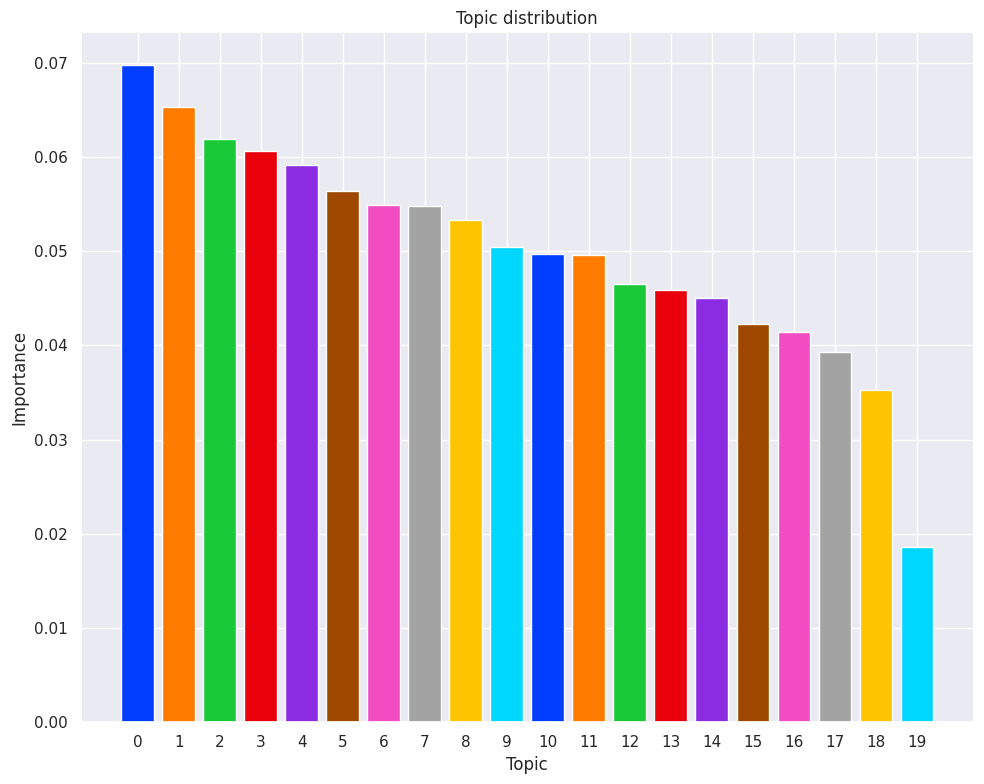

In [31]:
plsa_vis = Visualize(plsa_res)
fig, ax = plt.subplots()
plsa_vis.topics(ax)
fig.tight_layout()

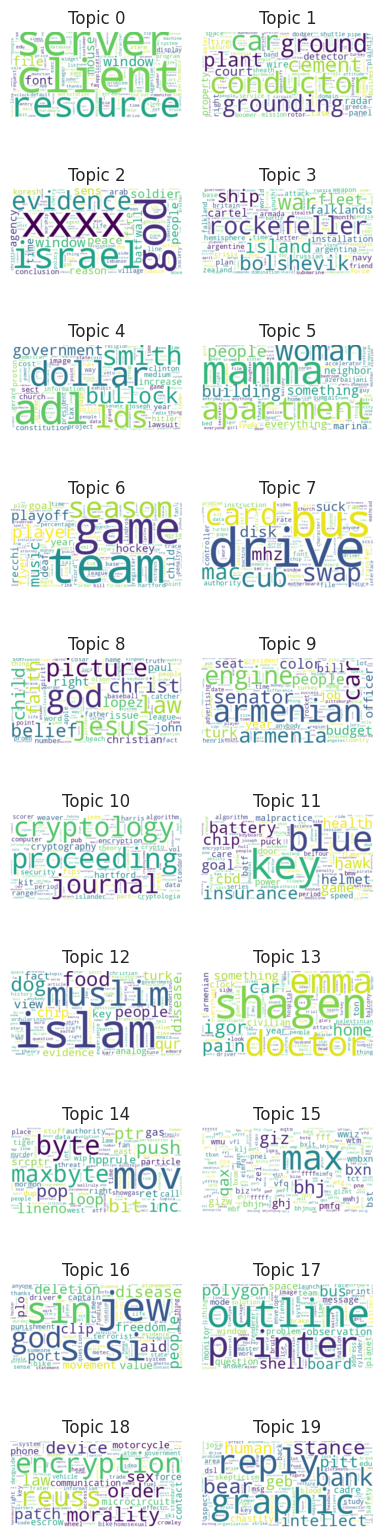

In [32]:
fig = plt.figure(figsize=(4, 16))
plsa_vis.wordclouds(fig)
plt.show()


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


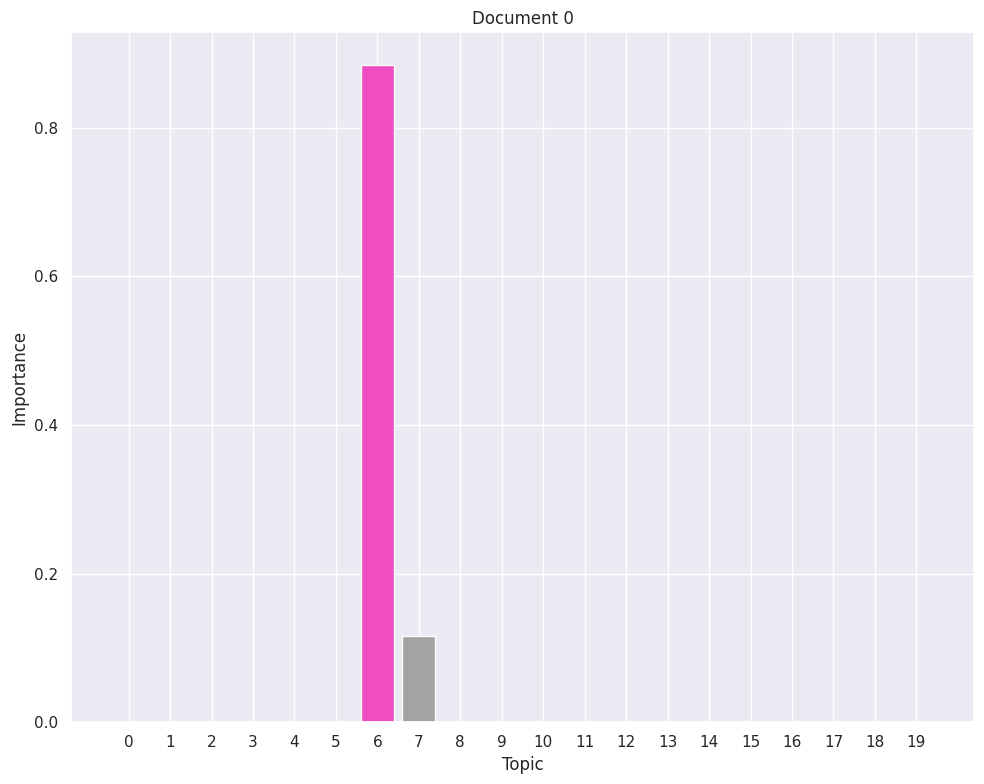

In [33]:
print(plsa_corpus.raw[0])
fig, ax = plt.subplots()
plsa_vis.topics_in_doc(0, ax)
fig.tight_layout()

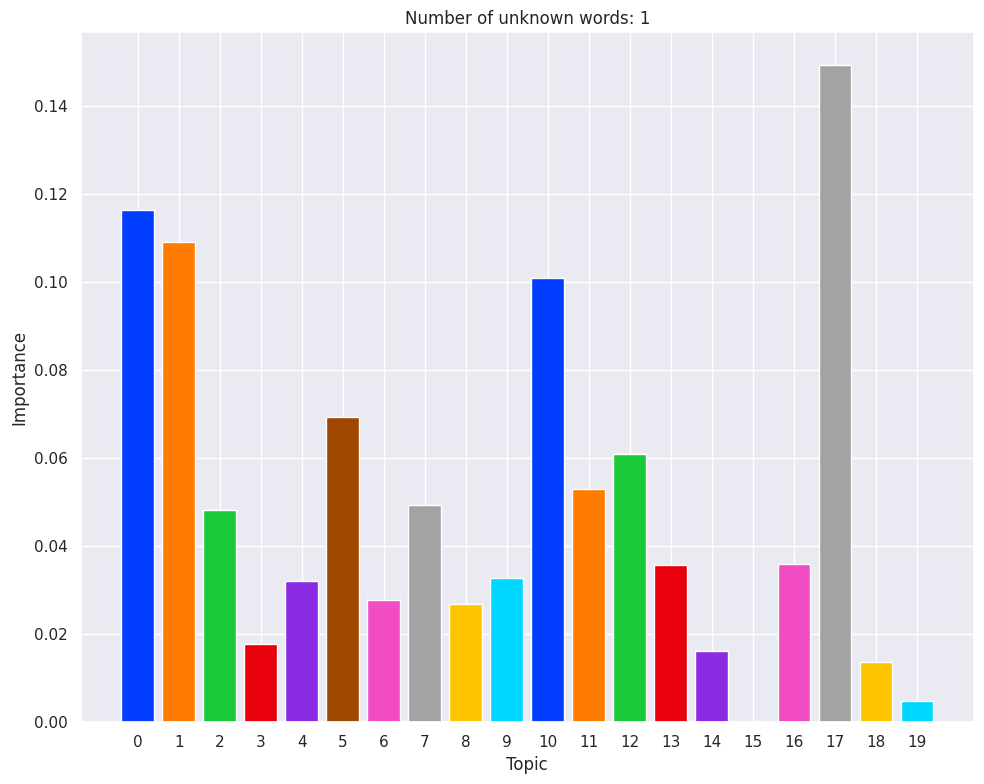

In [34]:
new_doc = (
    "Similar to a principal component analysis, the singular value decomposition "
    "If you’re familiar with this statistical method, encoding the original data set with these latent "
    "features using latent semantic analysis will minimize its dimensionality. "
    "These latent features correspond to the original text data’s subjects."
)

fig, ax = plt.subplots()
plsa_vis.prediction(new_doc, ax)
fig.tight_layout()

# Latent Dirichlet Allocation (LDA)

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    20, doc_topic_prior=None, topic_word_prior=None, n_jobs=-1, random_state=42
)
lda.fit(X)

/usr/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

,n_components,20
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [51]:
lda.perplexity(X)

np.float64(76169.93126753875)

In [55]:
feature_names[lda.components_[0].argsort()][-20:]

array(['93', 'orbit', 'ahl', 'arabia', 'moon', 'jose', 'saudi', '3do',
       'bison', 'apr', 'baltimore', 'yankee', 'spacecraft', 'satellite',
       '1993', 'baden', 'navy', 'san', 'ca', 'gm'], dtype=object)

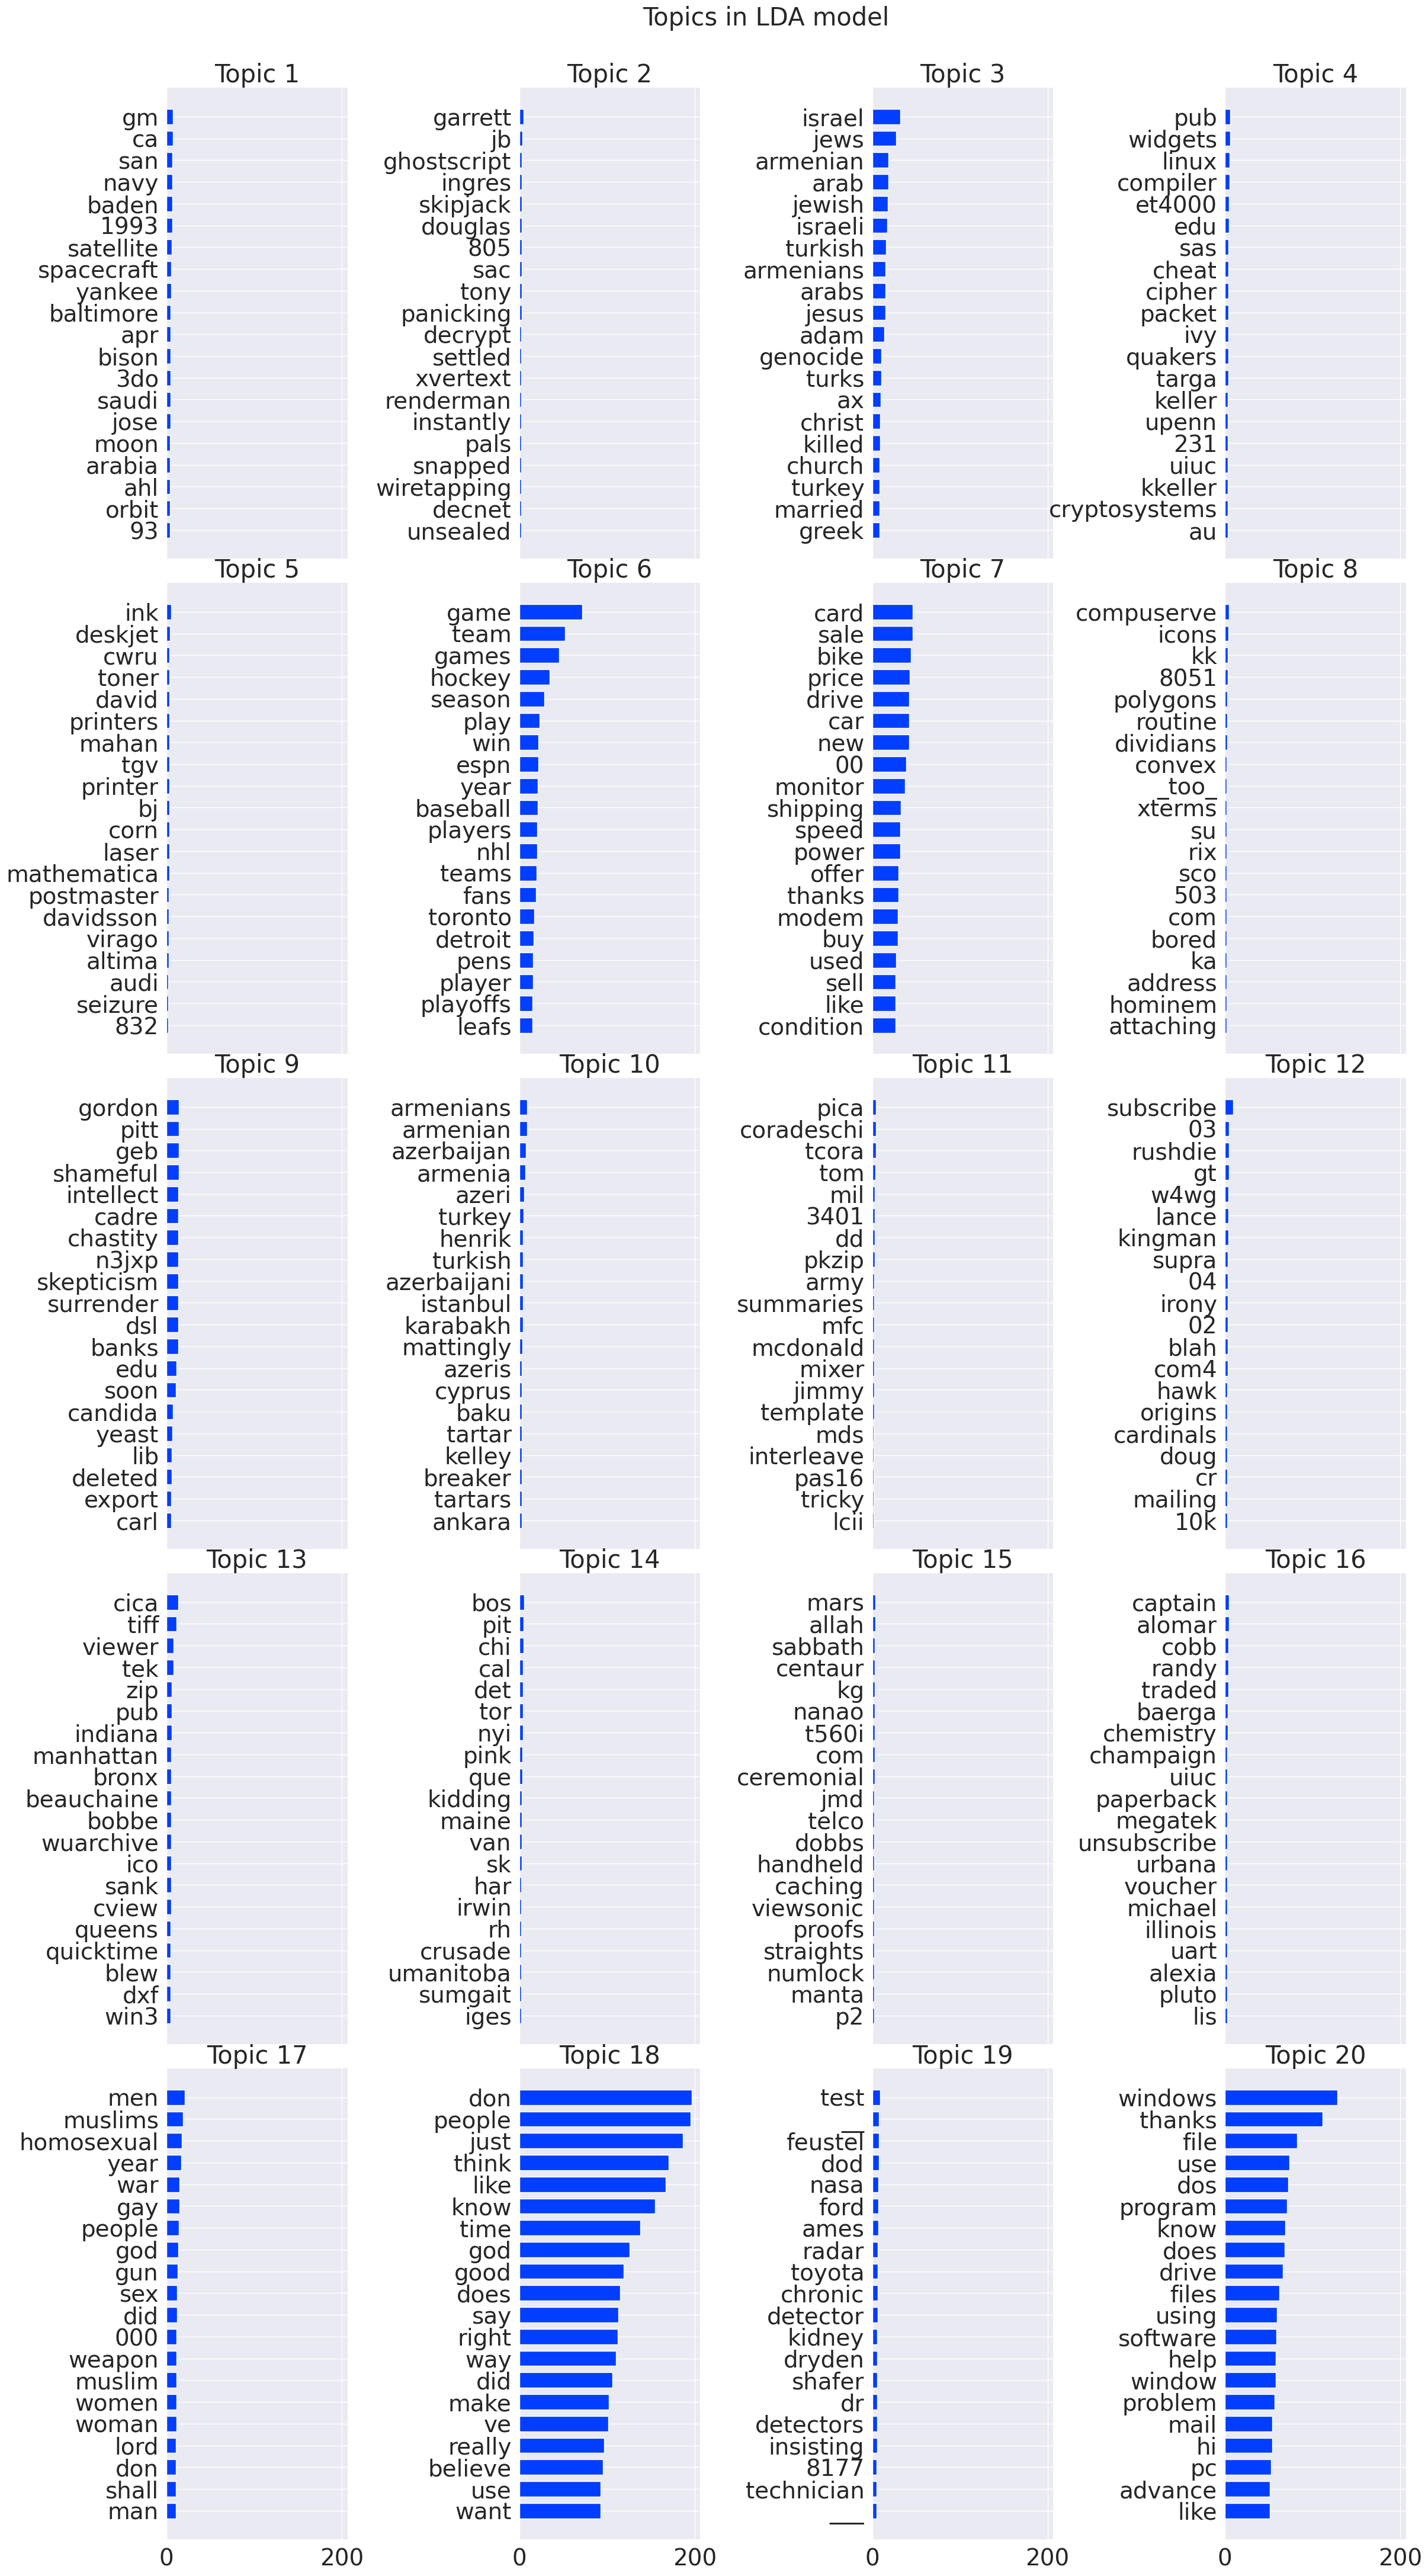

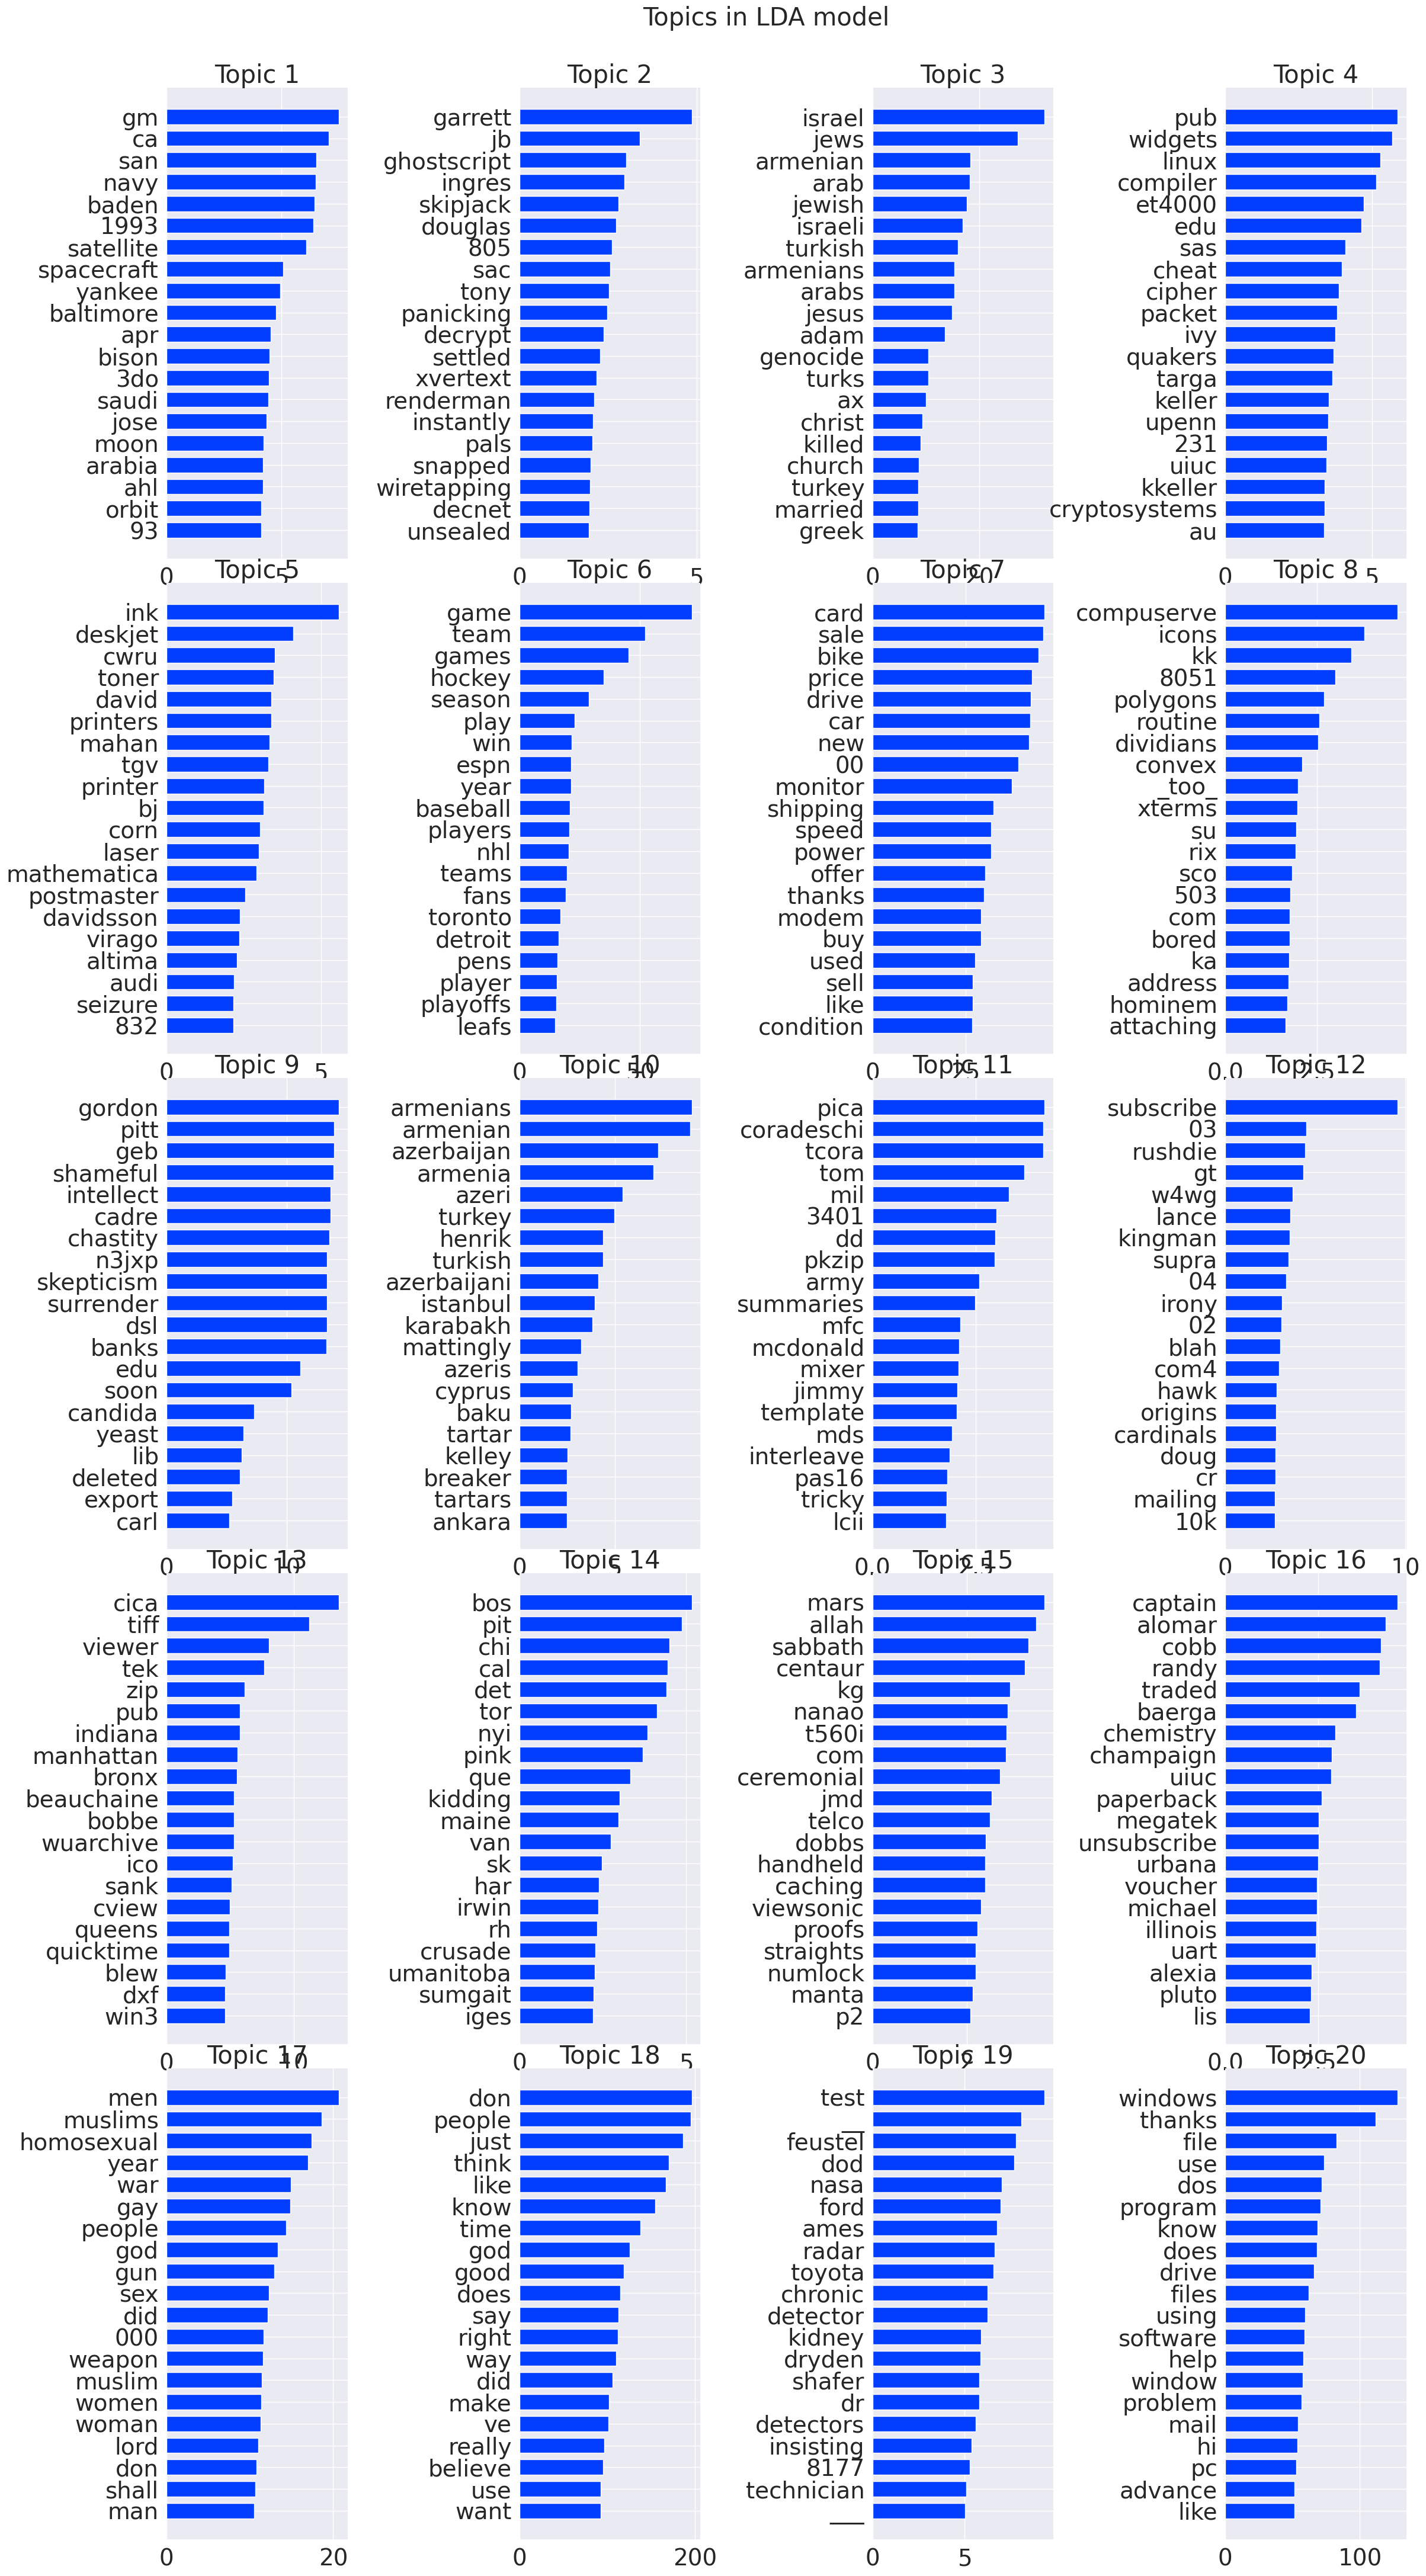

In [75]:
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title, sharex=True):
    fig, axes = plt.subplots(5, 4, figsize=(27, 46), sharex=sharex)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=28)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.95, bottom=0.05, wspace=0.95, hspace=0.05)
    plt.show()


plot_top_words(lda, feature_names, n_top_words, "Topics in LDA model")
plot_top_words(lda, feature_names, n_top_words, "Topics in LDA model", False)